<a href="https://colab.research.google.com/github/Ware-Hard-or-Soft/ML-DL-projects/blob/main/Decision_tree_construction_for_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision tree construction for classification purposes:
Load the dataset.
Recursively split the dataset based on the best feature using Gini impurity.
Construct a decision tree that can classify new instances based on the trained model
Author: David Zheng

In [ ]:
from numpy import *
from statistics import mode
from matplotlib import pyplot as plt
import sys
import numpy as np
import pandas as pd
import collections

In [ ]:
import treeplot

In [ ]:
def loadDataSet(filepath):
    data=[]
    featNames = None
    fr = open(filepath)
    for (i,line) in enumerate(fr.readlines()):
        array=line.strip().split(',')
        if i == 0:
            featNames = array[:-1]
        else:
            data.append(array)
    return data, featNames

In [ ]:
def splitData(dataSet, axis, value):
    subset = []
    for instance in dataSet:
        if instance[axis] == value:    # if contains the given feature value
            reducedVec = instance[:axis] + instance[axis+1:] # remove the given axis
            subset.append(reducedVec)
    return subset

In [ ]:
def chooseBestFeature(dataSet):

    gain=-float("inf")
    df=pd.DataFrame(dataSet)

    for i in range(len(df.columns)-1):
      featSet=collections.Counter(df[df.columns[-1]].tolist()).values()
      gini_feat=1
      for n in list(featSet):
        gini_feat-=(n/sum(list(featSet)))**2

      featValues = [d[i] for d in dataSet]
      uniqueVals = list(set(featValues))

      for value in uniqueVals:
        subset=splitData(dataSet, i, value)
        df_sub=pd.DataFrame(subset)
        gini_subSet=collections.Counter(df_sub[df_sub.columns[-1]].tolist()).values()
        temp_sub_gini=1
        for n in list(gini_subSet):
          temp_sub_gini-=(n/sum(list(gini_subSet)))**2
        gini_feat-=sum(list(gini_subSet))*temp_sub_gini/sum(list(featSet))

      if gini_feat>gain:
        bestFeatId=i
        gain=gini_feat

    return bestFeatId

In [ ]:
def stopCriteria(dataSet):
    assignedLabel = None
    df_stop=pd.DataFrame(dataSet)
    if len(df_stop[df_stop.columns[-1]].unique())==1:
      assignedLabel=df_stop[df_stop.columns[-1]].unique()[0]
    elif len(df_stop.columns)==1:
      print(df_stop.columns[-1])
      assignedLabel=mode(list(df_stop[df_stop.columns[-1]]))
    return assignedLabel

In [ ]:
def buildTree(dataSet, featNames):

    #df_dataSet=pd.DataFrame(dataSet, columns=featNames+['Label'])
    assignedLabel = stopCriteria(dataSet)
    if assignedLabel:
        return assignedLabel

    bestFeatId = chooseBestFeature(dataSet)
    #print(bestFeatId,featNames)
    bestFeatName = featNames[bestFeatId]

    myTree = {bestFeatName:{}}
    subFeatName = featNames[:]
    del(subFeatName[bestFeatId])
    featValues = [d[bestFeatId] for d in dataSet]
    uniqueVals = list(set(featValues))
    for value in uniqueVals:
        #featNames=subFeatName
        myTree[bestFeatName][value] = buildTree(splitData(dataSet, bestFeatId, value), subFeatName)


    return myTree

0
0
0
0
0
0
0
0
0
0
0
0


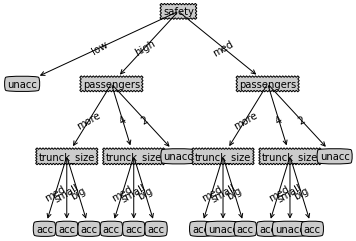

In [ ]:
if __name__ == "__main__":
    data, featNames = loadDataSet('car.csv')
    dtTree = buildTree(data, featNames)
    # print (dtTree)
    treeplot.createPlot(dtTree)
